In [59]:
!pip install celluloid


In [62]:
import numpy as np
from celluloid import Camera

In [23]:
def life_step(lattice):
    """Conway Game of life as I understood it"""
    x = np.shape(lattice)[0]
    y = np.shape(lattice)[1]

    for i in range(0,x):
        for j in range(0,y):
            sum = 0
            for k in [-1,0,1]:
                for l in [-1,0,1]:
                    if not (k ==0 and l ==0):     
                        sum = sum + lattice[(i+k)%x][(j+l)%y]
            if lattice[i][j] == 1:
                if sum > 3: lattice[i][j] = 0 #overpopulation
                elif sum in [2,3]: lattice[i][j] = 1 #stasis
                elif sum in [0,1]: lattice[i][j] = 0 #underpopulation
            elif lattice[i][j] == 0:
                if sum == 3: lattice[i][j] = 1 #reproduction
    return lattice

In [73]:
def generate_lattice(n,p):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if np.random.uniform() < p:
                lattice[i,j]=1
    return lattice

def generate_lattice_pq(n,p,q):
    lattice = np.zeros([n,n], dtype='int')
    for i in range(0,n):
        for j in range(0,n):
            if i > p and i < q and j > p and j < q:
                lattice[i,j]=1
    return lattice

In [63]:
lattice =  generate_lattice(30,0.5)

In [74]:
lattice =  generate_lattice_pq(100,40,60)

In [3]:
import matplotlib.pyplot as plt

In [76]:
x = lattice

In [66]:
x =  life_step(x)

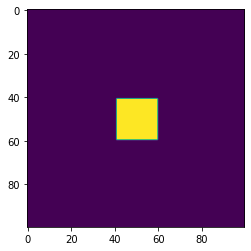

In [77]:
plt.imshow(x)

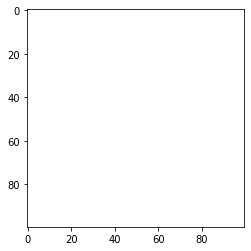

In [78]:
fig = plt.figure()
camera = Camera(fig)
for i in range(1,100):
    x =  life_step(x)
    plt.imshow( x, cmap = 'magma')
    camera.snap()
animation = camera.animate()
animation.save('gameoflife2.gif', writer = 'pillow')

In [79]:
from google.colab import files
files.download( "gameoflife2.gif" )    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>